# 一、基于 HHT 模型识别价格周期

## 价格周期和希尔伯特变换 (HT)

在金融市场中, 价格波动通常表现出一定的周期性, 即资产价格随时间变化表现出的重复性模式。这些模式可以是短期的日内周期, 也可以是中期的日间周期或长期的趋势周期。价格周期的存在表明市场并非完全随机, 而是存在一定的规律性和可预测性。价格周期反映了市场参与者的集体行为以及市场内外部因素的影响, 理解价格周期对于识别市场趋势、预测价格变动以及制定有效的交易策略非常重要。

那么, 如何识别价格周期和趋势呢? 典型方法有宏观基本面分析、技术分析、 频谱分析、时序预测模型和深度学习等。在这些方法中, 由于频谱分析可以分解出价格运动的幅度、频率和相位,对于周期识别无疑是较为适用的。下面,将基于频谱分析中的希尔伯特变换方法, 理解和识别价格运动的周期。

![](img/0194a840-7e87-7404-ba98-29259e8253d9_4_102_1287_1000_472_0.jpg)

希尔伯特变换(Hilbert Transform, HT)是一种线性变换,其作用是将一个实值信号转换为一个复数信号, 广泛应用于信号处理领域。对于给定的时间序列 $x\left( t\right)$ ,希尔伯特变换产生的复数信号可以表示为
$$z\left( t\right)  = x\left( t\right)  + j\widehat{x}\left( t\right)$$
其中, $j$ 是虚数单位, $\widehat{x}\left( t\right)$ 是 $x\left( t\right)$ 的希尔伯特变换结果。希尔伯特变换的数学表达式可以通过积分形式给出:
$$\widehat{x}\left( t\right)  = \frac{1}{\pi }\mathcal{P}{\int }_{-\infty }^{\infty }\frac{x\left( \tau \right) }{t - \tau }{d\tau }$$
其中, $\mathcal{P}$ 表示柯西主值,这是因为积分在 $t = \tau$ 处是奇异的,需要采用主值的方式来处理。
解析信号 $z\left( t\right)$ 可以分解为幅度和相位的形式:
$$z\left( t\right)  = A\left( t\right) {e}^{{j\theta }\left( t\right) },$$
其中, $A\left( t\right)$ 是信号的瞬时幅度,而 $\theta \left( t\right)$ 是瞬时相位,其分别可以通过如下方式计算:
$$A\left( t\right)  = \left| {z\left( t\right) }\right|  = \sqrt{x{\left( t\right) }^{2} + \widehat{x}{\left( t\right) }^{2}},$$
$$\theta \left( t\right)  = \arg \left( {z\left( t\right) }\right)  = \arctan \left( \frac{\widehat{x}\left( t\right) }{x\left( t\right) }\right) .$$

![](img/0194a840-7e87-7404-ba98-29259e8253d9_5_80_742_742_451_0.jpg)
![](img/0194a840-7e87-7404-ba98-29259e8253d9_5_923_763_509_419_0.jpg)

基于希尔伯特变换得到的瞬时相位,可以识别价格周期和当前所处的趋势。 相位 $\theta \left( t\right)$ 取值范围为 $\left\lbrack  {-\pi ,\pi }\right\rbrack$ ,当 $\theta \left( t\right)  \in  \left\lbrack  {0,\frac{\pi }{2}}\right\rbrack$ 即信号位于复平面的第一象限时,价格可能处于上升早期或刚刚从底部开始回升; 当 $\theta \left( t\right)  \in  \left\lbrack  {\frac{\pi }{2},\pi }\right\rbrack$ 即信号位于复平面的第二象限时,表明价格上升趋势持续,但可能即将到达顶部区域; 当 $\theta \left( t\right)  \in$ $\left\lbrack  {-\pi , - \frac{\pi }{2}}\right\rbrack$ 即信号位于复平面的第三象限时,表明价格开始从高位回落,进入下降趋势; 当 $\theta \left( t\right)  \in  \left\lbrack  {-\frac{\pi }{2},0}\right\rbrack$ 即信号位于复平面的第四象限时,表明价格持续下跌,但可能接近底部。

![](img/0194a840-7e87-7404-ba98-29259e8253d9_6_89_219_843_715_0.jpg)



## 经验模态分解(EMD)及改进算法(VMD)

然而,直接在资产价格上应用希尔伯特变换存在一些问题: 由于希尔伯特变换需要原始信号是窄带稳态信号, 而价格本身是非稳态、非线性的时间序列, 并且包括多种频率成分, 直接对价格数据应用希尔伯特变换可能得到错误结果。正确的做法是:首先对价格信号进行预处理和分解,得到单一频率的稳态信号,然后再应用希尔伯特变换进行分析处理。

经验模态分解(Empirical Mode Decomposition, EMD)是一种信号处理技术,可以将复杂时间序列分解成多个具有单一频率成分的本征模函数(Intrinsic Mode Functions, IMF)和一个剩余趋势项(Residual Trend)。每个 IMF 都是一个本征模,具有单一的瞬时频率,这使得 EMD 非常适合分析非线性和非平稳信号,进而能够让后续的希尔伯特变换分析更加精确。

EMD 的分解过程包括以下步骤:

✓ 识别局部极值:找出原始信号中的所有局部极大值和极小值。

✓ 插值形成包络线:在所有局部极大值之间进行插值形成一个上包络线； 在所有局部极小值之间进行插值形成一个下包络线。

✓ 计算中间包络线:计算上包络线和下包络线的平均值,形成中间包络线。

✓ 筛选过程:从原始信号中减去中间包络线,得到第一个近似的 IMF。

✓ 停止准则:重复步骤 1-4,直到得到的近似 IMF 满足停止准则。通常的停止准则是 IMF 中相邻极大值和极小值之间的平均值趋近于 0 , 且 IMF 中相邻极大值和极小值之间的标准差小于某个阈值。

✓ 重复提取:从剩余信号中重复上述步骤,直到剩余信号成为一个单调函数或满足停止准则。

✓ 最终分解:最终得到一系列 IMF 和一个剩余趋势项(Residual Trend),

后者通常是一个单调函数或一个非常缓慢变化的趋势。

假设原始信号为 $x\left( t\right)$ ,第 $i$ 个 IMF 为 ${IM}{F}_{i}\left( t\right)$ ,剩余趋势项为 $r\left( t\right)$ 。EMD 的目标是将 $x\left( t\right)$ 分解为:
$$x\left( t\right)  = \mathop{\sum }\limits_{{i = 1}}^{N}{IM}{F}_{i}\left( t\right)  + r\left( t\right) ,$$

其中, $N$ 是分解得到的 $\mathsf{{IMF}}$ 的数量。

以沪深 300 指数价格为例, 基于 EMD 可以将价格分解为 9 个 IMF, 分别为从高频到低频的 IMF 信号,分别可以对应价格的短、中、长维度的周期。

In [ ]:
import sys
from itertools import product
from pathlib import Path
from typing import List, Tuple

sys.path.append(str(Path().cwd().parents[1]))
import empyrical as ep
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PyEMD import EMD
from scipy.signal import hilbert
from src.plotting import plot_cumulative_returns

plt.style.use('seaborn')
# 设置中文
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

In [2]:
# 读取数据
index_data:pd.DataFrame = pd.read_parquet('data/daily.parquet')

In [3]:
close_ser:pd.Series = index_data.query("code=='000300.SH'")['close']
open_ser:pd.Series = index_data.query("code=='000300.SH'")['open']

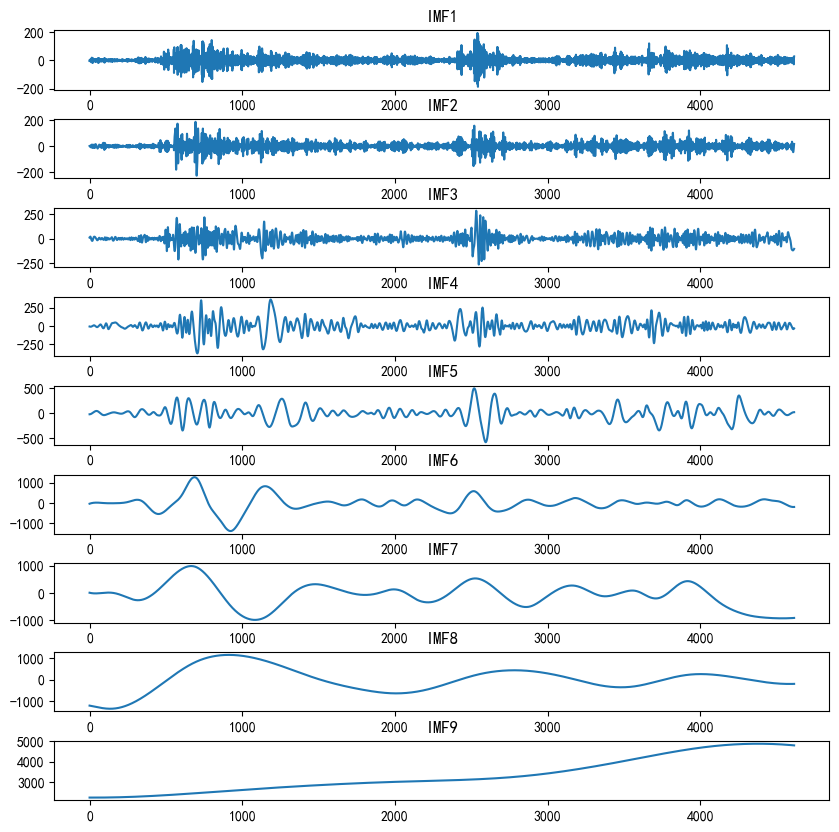

In [4]:
emd = EMD()
imfs = emd.emd(close_ser.values, max_imf=9)

fig,axes = plt.subplots(len(imfs),1,figsize=(10,10))
for i,v in enumerate(imfs):
    axes[i].plot(v)
    axes[i].set_title(f'IMF{i+1}')

plt.subplots_adjust(hspace=0.5)

EMD 具有多项优点:

1) 自适应性:EMD 不需要预先设定基函数,而是根据信号自身特性自适应地分解。

2) 非线性和非平稳信号处理:EMD 特别适合处理非线性和非平稳信号。

3) 多尺度分析:EMD 可将信号分解成不同尺度的 IMF,便于多尺度分析。

但同时, EMD 也存在一些局限:

1) 端点效应:在信号的起始和结束部分可能存在边界效应。

2) 模式混淆:当信号中存在相近频率的成分时,可能会发生模式混淆。

3) 计算复杂度:EMD 的计算量较大,特别是对于较长的时间序列。

针对 EMD 的局限性, Dragomiretskiy 和 Zosso 在 2014 年提出了一种改进方法——变分模态分解(Variational Mode Decomposition, VMD), VMD 是一种自适应、完全非递归的模态变分和信号处理的方法, 其自适应性表现在根据实际情况确定所给序列的模态分解个数, 随后的搜索和求解过程中可以自适应地匹配每种模态的最佳中心频率和有限带宽,并且可以实现 IMF 的有效分离、信号的频域划分, 进而得到给定信号的有效分量, 最终获得变分问题的最优解, 进而能够避免 EMD 中的一些问题,如端点效应和模态混叠。

VMD 的整体框架是变分问题, 假设每个模态是具有不同中心频率的有限带宽, 目标是使每个模态的估计带宽之和最小, 因此该算法可分为变分问题的构造和求解。

VMD 的优点:

1) 克服了 EMD 方法存在端点效应和模态分量混叠的问题(通过控制带宽来避免混叠现象),同时具有更坚实的数学理论基础。

2) 可以降低复杂度高和非线性强的时间序列非平稳性, 分解获得包含多个不同频率尺度且相对平稳的子序列, 适用于非平稳性的序列。

VMD 的缺点:

1) 最大的局限性是边界效应和突发的信号。这与基于 L2 平滑阶段的使用密切相关,该阶段过度惩罚了域边界和内部的跳跃。

2) 要求预先定义模态数 $\mathrm{K}$ ,与聚类和分段算法具有相同的缺点。

## 希尔伯特-黄变换 (HHT)

传统的频谱分析方法如傅里叶变换和小波变换等假设信号是线性的并且是平稳的,但现实世界中的许多信号并不满足这些假设。例如,在地震学、气象学以及金融市场上, 信号往往是非线性的且随时间发生变化, 这就使得传统频谱分析方法无法准确地捕捉到这些信号的动态特性。为了克服这些问题,美国国家大气研究中心(NCAR)的 Norden E. Huang 博士和他的团队提出了希尔伯特-黄变换(Hilbert-Huang Transform, HHT),并发表在《Proceedings of the Royal Society of London A》杂志上。这种方法结合了经验模态分解(EMD)和希尔伯特谱分析(HSA),旨在解决非线性、非平稳信号的分析问题。HHT 能够将信号分解为一组本征模态函数(IMFs),每组 IMF 都代表着信号中不同尺度的振荡模式。随后,通过对这些 IMFs 进行希尔伯特变换,可以获得信号的瞬时频率和瞬时幅值,从而得到信号的希尔伯特谱。

![](img/0194a840-7e87-7404-ba98-29259e8253d9_8_143_1568_928_363_0.jpg)

将价格数据经 $\mathrm{{HHT}}$ 变换后得到相位 $\theta \left( t\right)$ ,可以基于二分类算法如 Logistic 回归、朴素贝叶斯、决策树、KNN、SVM、XGBoost 等机器学习方法构建相位和涨跌幅的映射关系,进而依据当前相位对未来涨跌幅进行预测。

## 基于 HHT 模型和分类算法的指数择时策略

首先,直接基于预处理后的价格数据进行希尔伯特变换(HT),再根据得到的相位结果作出择时判断。根据前文所述,当相位 $\theta \left( t\right)  \in  \left\lbrack  {0,\frac{\pi }{2}}\right\rbrack$ 即信号位于复平面的第一象限时,价格可能处于上升早期或刚刚从底部开始回升; 当 $\theta \left( t\right)  \in  \left\lbrack  {\frac{\pi }{2},\pi }\right\rbrack$ 即信号位于复平面的第二象限时, 表明价格上升趋势持续, 但可能即将到达顶部区域。总之,当 $\theta \left( t\right)  > 0$ 时,我们认为当前指数处于上升趋势。

其次, 在 HT 的基础上, 引入 EMD 即基于 HHT 构建择时策略: 将指数收盘价通过 EMD 分解为不同频率的 ${IM}{F}_{i}$ 序列,提取次高频的 ${IM}{F}_{2}$ 或 ${IM}{F}_{3}$ 序列(最高频的 ${IM}{F}_{1}$ 代表噪声)。接着,将提取的 ${IM}{F}_{3}$ 经过希尔伯特变换得到相位 $\theta \left( t\right)$ 序列。 最后,通过相位 $\theta \left( t\right)$ 来判断指数当前所处的周期进而作出择时判断。

然而, 不同时间指数的周期模式可能有所区别, 因此不同时间的相位对应指数所处的周期位置也可能并不完全一致。如何动态刻画和精确描述上涨趋势所对应的相位呢？接下来,通过机器学习算法(逻辑回归、支持向量机、朴素贝叶斯), 基于相位和未来涨跌幅的历史数据来拟合两者关系,再根据当前相位 $\theta \left( t\right)$ 对未来指数趋势做出预测。

为了对比不同算法下的择时策略表现, 下面我们将分别采用 HT (希尔伯特变换)、HHT(HT+EMD)、HHTML(HHT+MachineLearning)、MHHTML (Modified HHT+Machine Learning)构建择时策略,考察策略回测效果。


### 基于 HT 模型的指数择时策略

以沪深 300 为例, 将沪深 300 收盘价通过希尔伯特变换分解为幅度和相位, 根据前面的分析,当相位处于 $\left\lbrack  {0,\pi }\right\rbrack$ 的范围时,价格处于上涨趋势,此时择时信号应为看多。但是要注意,对一个实值信号进行希尔伯特变换时,得到的虚部实际上是原信号经过了 $\pi /2$ 相位延迟的结果。在根据相位判断指数所处周期位置时, 需要考虑相位延迟的因素。因此,实际上,当相位处于 $\left\lbrack  {-\frac{\pi }{2},\frac{\pi }{2}}\right\rbrack$ 的范围时,价格处于上涨趋势, 此时择时信号应为看多。由于信号为日频, 故我们将成交价格设为次日收盘价。另外, 由于价格是非稳态序列, 希尔伯特变换适用于窄带平稳信号, 因此需要对价格数据进行预处理,即平滑(去噪)和差分(去趋势)。

从回测结果来看, HT 模型年化收益 9.71%,跑赢沪深 300 指数,回撤相对较低,但是整体效果仍待提升。

In [5]:
from backtrader_utils.bt_template import run_template_strategy
from backtrader_utils.datafeed import DailyOHLCVUSLFeed
from strategy.binary_signal_strategy import BinarySignalStrategy

from SignalMaker.hht_signal import (get_hht_signal, get_ht_binary_signal,
                                    get_ht_signal, parallel_apply)
from src.performance import show_trade_stats
from src.plotting_utils import get_strategy_return

/root/miniconda3/envs/dev/lib/python3.10/site-packages/pyfolio/pos.py:25: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


In [6]:
hs300_data:pd.DataFrame = index_data.query("code=='000300.SH'")
# 查看数据结构
hs300_data.head()

,code,close,open,high,low,pre_close,change,pct_chg,volume,amount
trade_date,,,,,,,,,,
2005-01-04,000300.SH,982.794,994.769,994.769,980.658,1000.000,-17.206,-1.7206,741286894.0,4.431977e+10
2005-01-05,000300.SH,992.564,981.577,997.323,979.877,982.794,9.770,0.9941,711910898.0,4.529208e+10
2005-01-06,000300.SH,983.174,993.331,993.788,980.330,992.564,-9.390,-0.9460,628802905.0,3.921015e+10
2005-01-07,000300.SH,983.958,983.045,995.711,979.812,983.174,0.784,0.0797,729869409.0,4.737469e+10
2005-01-10,000300.SH,993.879,983.760,993.959,979.789,983.958,9.921,1.0083,579169799.0,3.762933e+10


In [7]:
hs300_ht_signal: pd.DataFrame = get_ht_signal(hs300_data, 60, 30).dropna(
    subset=["binary_signal"]
)
# 查看数据结构
hs300_ht_signal.head()

,code,close,open,high,low,pre_close,change,pct_chg,volume,amount,binary_signal
trade_date,,,,,,,,,,,
2005-05-25,000300.SH,868.451,867.658,876.305,861.659,868.456,-0.005,-0.0006,723855600.0,3.742173e+10,0.0
2005-05-26,000300.SH,857.331,867.758,872.835,854.956,868.451,-11.120,-1.2804,662278600.0,3.470051e+10,0.0
2005-05-27,000300.SH,849.508,855.595,864.963,848.398,857.331,-7.823,-0.9125,774998300.0,4.240679e+10,0.0
2005-05-30,000300.SH,855.612,847.634,858.462,842.102,849.508,6.104,0.7185,697158300.0,3.712116e+10,0.0
2005-05-31,000300.SH,855.946,856.561,863.198,853.291,855.612,0.334,0.0390,704782100.0,3.601007e+10,0.0


In [8]:
# 使用backtrader进行
strat = run_template_strategy(
        hs300_ht_signal,
        "000300.SH",
        BinarySignalStrategy,
        strategy_kwargs={"verbose": False, "hold_num": 1},
    )

2025-02-07 10:56:34.500 | INFO     | backtrader_utils.engine:load_data:119 - 开始加载数据...
数据加载到回测引擎...: 100%|██████████| 1/1 [00:00<00:00, 395.13it/s]
2025-02-07 10:56:34.506 | SUCCESS  | backtrader_utils.engine:load_data:134 - 数据加载完毕！


<Axes: title={'center': 'Cumulative Return: 809.41% | Annual Return: 13.08% | Annual Volatility: 17.67% | Sharpe Ratio: 0.78 | Max Drawdown: -38.18%'}, xlabel='Date', ylabel='Cumulative Returns'>

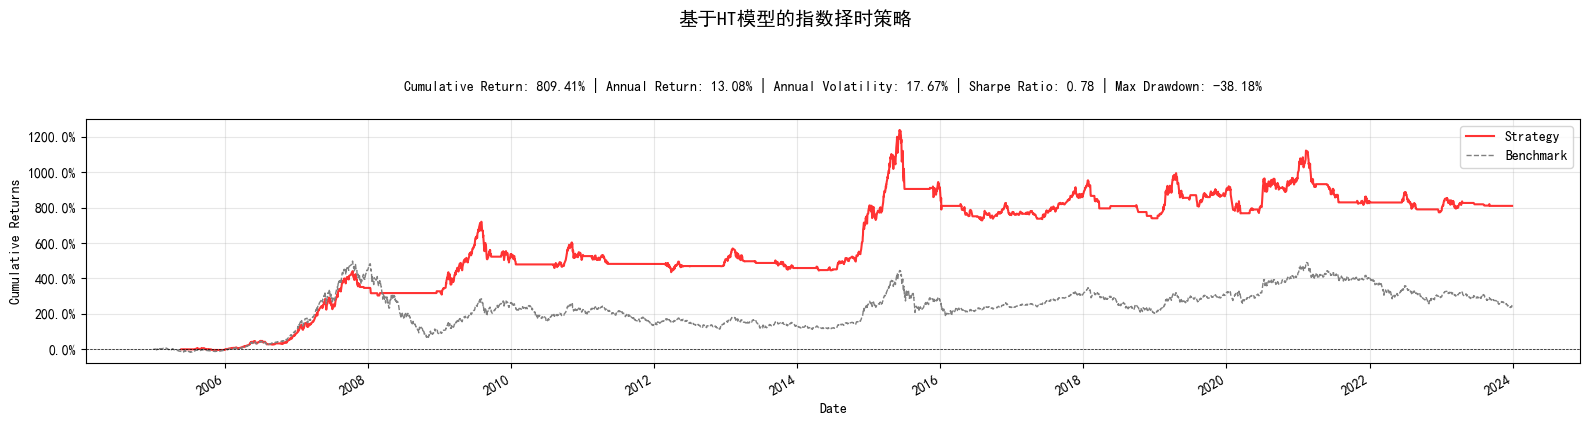

In [9]:
plot_cumulative_returns(
    get_strategy_return(strat),
    hs300_data["close"].pct_change(),
    title="基于HT模型的指数择时策略",
    figsize=(16, 4),
)

In [12]:
show_trade_stats(strat)

,Trade Stats
Annual return,13.08%
Sharpe ratio,0.78
Max drawdown,38.18%
Trade Num,95
Win Rate,43.16%
Win Loss Ratio,2.36


### 基于 HHT 模型的指数择时策略

由于希尔伯特变换要求输入的数据必须是平稳的, 上节的做法是平滑+差分, 但是更标准的做法应当是通过 EMD 将价格序列分解为稳态单一频率的 IMFs, 再取合适的 IMF 进行希尔伯特变换。接下来,我们直接将指数价格序列输入到 EMD 中,分解得到 IMFs,取代表中高频的 IMF3 作为输入进行希尔伯特变换。

从结果来看,基于 HHT 模型的效果要略优于 HT 模型,年化收益达到 10% 以上,盈亏比有所提升,但是整体效果仍待改进。

#### EMD+HT

In [5]:
# 分解为9组，取第3组做ht变换择时
hs300_hht_signal: pd.DataFrame = get_hht_signal(hs300_data, 60, 2, 9, "EMD").dropna(
    subset=["binary_signal"]
)

Processing: 100%|██████████| 4557/4557 [00:02<00:00, 1645.26it/s]


In [14]:
hht_strat = run_template_strategy(
        hs300_hht_signal,
        "000300.SH",
        BinarySignalStrategy,
        strategy_kwargs={"verbose": False, "hold_num": 1},
    )

2025-02-06 14:39:31.895 | INFO     | backtrader_utils.engine:load_data:119 - 开始加载数据...
数据加载到回测引擎...: 100%|██████████| 1/1 [00:00<00:00, 364.79it/s]
2025-02-06 14:39:31.901 | SUCCESS  | backtrader_utils.engine:load_data:134 - 数据加载完毕！


/data1/hugo/workspace/jupyter_develop/结合改进HHT模型和分类算法的交易策略/src/plotting.py:48: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f'Cumulative Return: {cum_returns[-1]:.2%} | '


<Axes: title={'center': 'Cumulative Return: 407.99% | Annual Return: 9.40% | Annual Volatility: 19.69% | Sharpe Ratio: 0.56 | Max Drawdown: -55.49%'}, xlabel='Date', ylabel='Cumulative Returns'>

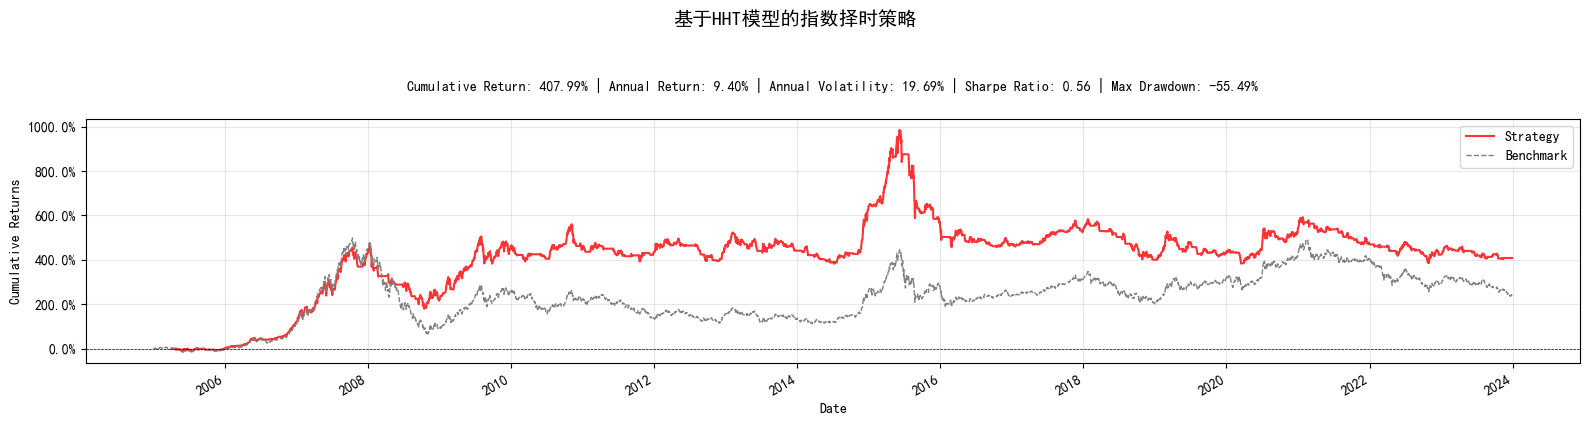

In [15]:
plot_cumulative_returns(
    get_strategy_return(hht_strat),
    hs300_data["close"].pct_change(),
    title="基于HHT模型的指数择时策略",
    figsize=(16, 4),
)

In [16]:
show_trade_stats(hht_strat)

,Trade Stats
Annual return,9.40%
Sharpe ratio,0.56
Max drawdown,55.49%
Trade Num,370
Win Rate,45.68%
Win Loss Ratio,1.40


#### VMD+HT

In [17]:
# 分解为9组，取第3组做ht变换择时
hs300_vhht_signal: pd.DataFrame = get_hht_signal(hs300_data, 60, 2, 9, "VMD").dropna(
    subset=["binary_signal"]
)

 : 4557it [00:18, 240.15it/s]


In [18]:
vhht_strat = run_template_strategy(
    hs300_vhht_signal,
    "000300.SH",
    BinarySignalStrategy,
    strategy_kwargs={"verbose": False, "hold_num": 1},
)

2025-02-06 14:39:53.129 | INFO     | backtrader_utils.engine:load_data:119 - 开始加载数据...
数据加载到回测引擎...: 100%|██████████| 1/1 [00:00<00:00, 371.74it/s]
2025-02-06 14:39:53.135 | SUCCESS  | backtrader_utils.engine:load_data:134 - 数据加载完毕！


/data1/hugo/workspace/jupyter_develop/结合改进HHT模型和分类算法的交易策略/src/plotting.py:48: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f'Cumulative Return: {cum_returns[-1]:.2%} | '


<Axes: title={'center': 'Cumulative Return: 199.71% | Annual Return: 6.26% | Annual Volatility: 17.20% | Sharpe Ratio: 0.44 | Max Drawdown: -58.36%'}, xlabel='Date', ylabel='Cumulative Returns'>

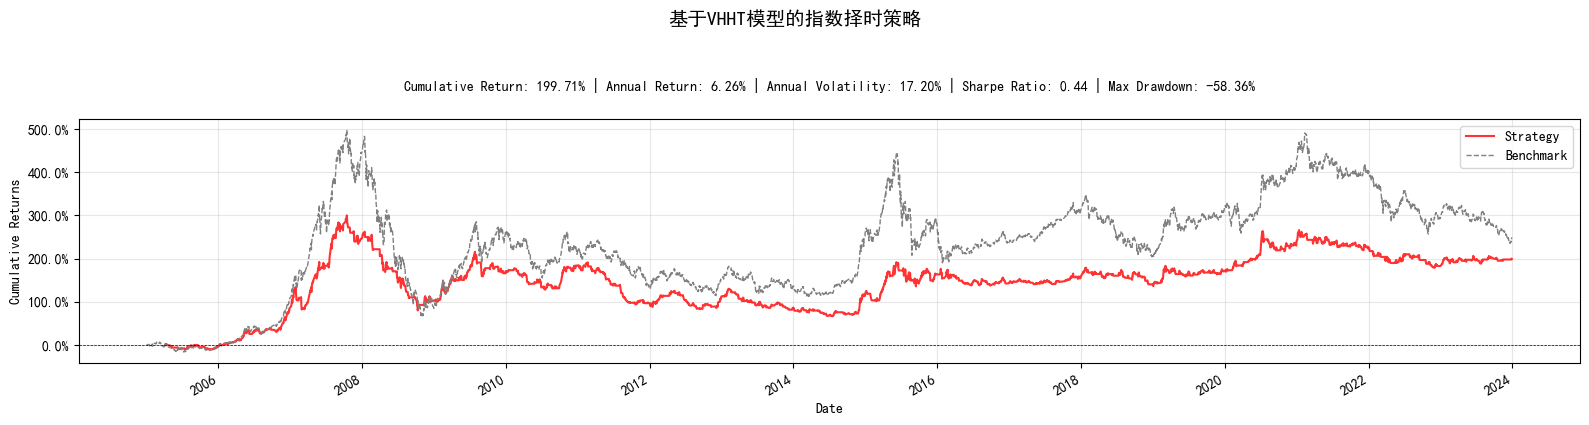

In [19]:
plot_cumulative_returns(
    get_strategy_return(vhht_strat),
    hs300_data["close"].pct_change(),
    title="基于VHHT模型的指数择时策略",
    figsize=(16, 4),
)

## 基于 HHT 模型和分类算法的指数择时策略

由于金融市场的复杂性和可变性特征, 价格的相位和所处周期趋势的映射关系可能并不固定, 即相位和周期趋势的关系是动态变化的。因此, 我们需要引入能够刻画两者关系的模型, 来动态跟踪不同市场环境下相位和周期的映射关系。这里,我们应用机器学习算法(Machine Learning)来解决该二分类问题:采用滚动学习，将过去 $\mathrm{M}$ 日 ${}^{1}$ 的相位信号作为 $\mathrm{X}$ ,未来 1 日涨跌幅作为 $\mathrm{Y}$ ,输入二分类器训练,再将当日相位输入训练好的模型得到预测结果,分类器每隔 5 日重新训练。

In [8]:
from src.rolling import run_rolling_prediction

In [ ]:
# 计算窗口
periods: List[int] = [5, 10, 30, 60, 90, 120]
# 算法
methods: List[str] = ["EMD", "VMD"]

params: List = list(product(periods, methods))
names: List[str] = [f"{p[1]}_{p[0]}" for p in params]

In [9]:
# 生成信号
instantaneous_phase: pd.DataFrame = pd.concat(
    (
        get_hht_signal(hs300_data[["close"]], p[0], 2, 9, p[1])["binary_signal"]
        for p in params
    ),
    axis=1,
    keys=names,
)

Processing: 100%|██████████| 4497/4497 [00:23<00:00, 188.98it/s]


In [10]:
instantaneous_phase.tail()

,EMD_5,VMD_5,EMD_10,VMD_10,EMD_30,VMD_30,EMD_60,VMD_60,EMD_90,VMD_90,EMD_120,VMD_120
trade_date,,,,,,,,,,,,
2023-12-25,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2023-12-26,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
2023-12-27,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
2023-12-28,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2023-12-29,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0


In [23]:
# instantaneous_phase.to_parquet('data/instantaneous_phase.parquet')

In [6]:
instantaneous_phase: pd.DataFrame = pd.read_parquet("data/instantaneous_phase.parquet")

In [11]:
# 忽略前序期
instantaneous_phase: pd.DataFrame = instantaneous_phase.iloc[max(periods) - 1 :]
# 生成滚动预测
instantaneous_phase["next_return"] = hs300_data["open"].pct_change().shift(-2)

## RFC模型

In [12]:
# 特征列
feature_cols: List[str] = [
    col for col in instantaneous_phase.columns if col != "next_return"
]
# 二分类故将收益率转换为二分类
instantaneous_phase["target"] = instantaneous_phase["next_return"].apply(
    lambda x: 1 if x > 0 else 0
)

In [13]:
# 默认使用随机森林分类器
predictions = run_rolling_prediction(
    df=instantaneous_phase,
    feature_cols=feature_cols,
    target_col='target',
    step=5, # 滚动步长
    train_window=60, # 训练窗口
    horizon=5, # 预测步长
    return_probability=False,
)

Rolling prediction: 100%|██████████| 887/887 [01:28<00:00, 10.04it/s]


In [15]:
rf_cf: pd.DataFrame = pd.concat(
    (hs300_data, predictions.to_frame(name="binary_signal")), axis=1
).dropna(subset=["binary_signal"])

In [17]:
hht_rf_strat = run_template_strategy(
        rf_cf,
        "000300.SH",
        BinarySignalStrategy,
        strategy_kwargs={"verbose": False, "hold_num": 1},
    )

2025-02-06 15:05:13.409 | INFO     | backtrader_utils.engine:load_data:119 - 开始加载数据...
数据加载到回测引擎...: 100%|██████████| 1/1 [00:00<00:00, 350.34it/s]
2025-02-06 15:05:13.415 | SUCCESS  | backtrader_utils.engine:load_data:134 - 数据加载完毕！


/data1/hugo/workspace/jupyter_develop/结合改进HHT模型和分类算法的交易策略/src/plotting.py:48: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f'Cumulative Return: {cum_returns[-1]:.2%} | '


<Axes: title={'center': 'Cumulative Return: 232.84% | Annual Return: 7.07% | Annual Volatility: 18.35% | Sharpe Ratio: 0.46 | Max Drawdown: -62.14%'}, xlabel='Date', ylabel='Cumulative Returns'>

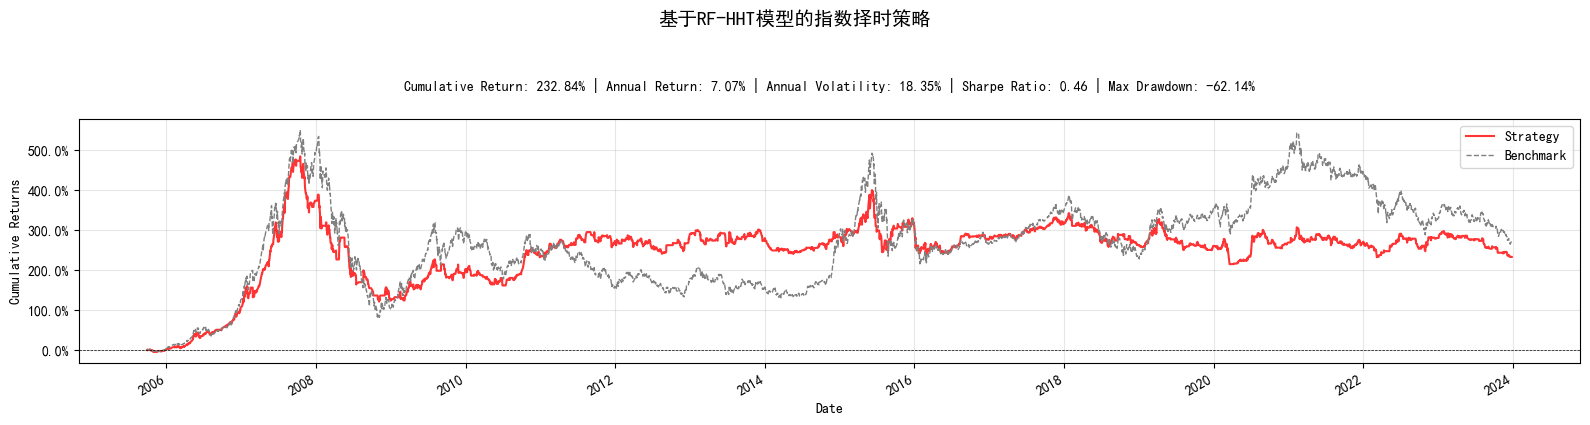

In [19]:
plot_cumulative_returns(
    get_strategy_return(hht_rf_strat),
    hs300_data["close"].pct_change().loc[rf_cf.index],
    title="基于RF-HHT模型的指数择时策略",
    figsize=(16, 4),
)

## LGBC模型

In [21]:
import lightgbm as lgb

def create_lgb_classifier_model(random_state=42):
    """
    创建LGBMClassifier模型实例
    """
    params = {
        # 核心参数
        "objective": "binary",  # 二分类问题
        "boosting_type": "gbdt",  # 提升树类型
        "n_estimators": 100,  # 树的数量
        "learning_rate": 0.1,  # 学习率
        # 树的参数
        "num_leaves": 31,  # 叶子数量
        "max_depth": -1,  # 树的最大深度，-1表示无限制
        "min_child_samples": 20,  # 叶子节点最小样本数
        "min_child_weight": 0.001,  # 叶子节点最小权重和
        # 特征参数
        "feature_fraction": 0.8,  # 每次迭代随机选择80%的特征
        "subsample": 0.8,  # 每次迭代随机选择80%的样本
        "subsample_freq": 1,  # 每次迭代都进行采样
        # 正则化参数
        "lambda_l1": 0.0,  # L1正则化
        "lambda_l2": 0.0,  # L2正则化
        # 其他参数
        "random_state": random_state,  # 随机种子
        "n_jobs": -1,  # 使用所有CPU核心
        "verbose": -1,  # 不显示训练信息
        # 类别特征参数（如果有类别特征）
        "categorical_feature": "auto",  # 自动识别类别特征
    }

    return lgb.LGBMClassifier(**params)

In [22]:
lgb_cf_predictions = run_rolling_prediction(
    df=instantaneous_phase,
    feature_cols=feature_cols,
    target_col="target",
    step=5,
    train_window=60,
    horizon=5,
    model=create_lgb_classifier_model(),
    return_probability=False,
)

Rolling prediction:   0%|          | 0/887 [00:00<?, ?it/s]/root/miniconda3/envs/dev/lib/python3.10/site-packages/lightgbm/basic.py:2108: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(
/root/miniconda3/envs/dev/lib/python3.10/site-packages/lightgbm/basic.py:2130: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")
Rolling prediction:   0%|          | 1/887 [00:12<3:00:20, 12.21s/it]/root/miniconda3/envs/dev/lib/python3.10/site-packages/lightgbm/basic.py:2108: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(
/root/miniconda3/envs/dev/lib/python3.10/site-packages/lightgbm/basic.py:2130: UserWarning: categorical_feature in param 

In [23]:
lgb_cf: pd.DataFrame = pd.concat(
    (hs300_data, lgb_cf_predictions.to_frame(name="binary_signal")), axis=1
).dropna(subset=["binary_signal"])

In [24]:
# 使用bt框架回测
hht_lgb_strat = run_template_strategy(
        lgb_cf,
        "000300.SH",
        BinarySignalStrategy,
        strategy_kwargs={"verbose": False, "hold_num": 1},
    )

2025-02-06 15:27:57.756 | INFO     | backtrader_utils.engine:load_data:119 - 开始加载数据...
数据加载到回测引擎...: 100%|██████████| 1/1 [00:00<00:00, 366.86it/s]
2025-02-06 15:27:57.762 | SUCCESS  | backtrader_utils.engine:load_data:134 - 数据加载完毕！


/data1/hugo/workspace/jupyter_develop/结合改进HHT模型和分类算法的交易策略/src/plotting.py:48: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f'Cumulative Return: {cum_returns[-1]:.2%} | '


<Axes: title={'center': 'Cumulative Return: 652.66% | Annual Return: 12.15% | Annual Volatility: 18.79% | Sharpe Ratio: 0.70 | Max Drawdown: -54.31%'}, xlabel='Date', ylabel='Cumulative Returns'>

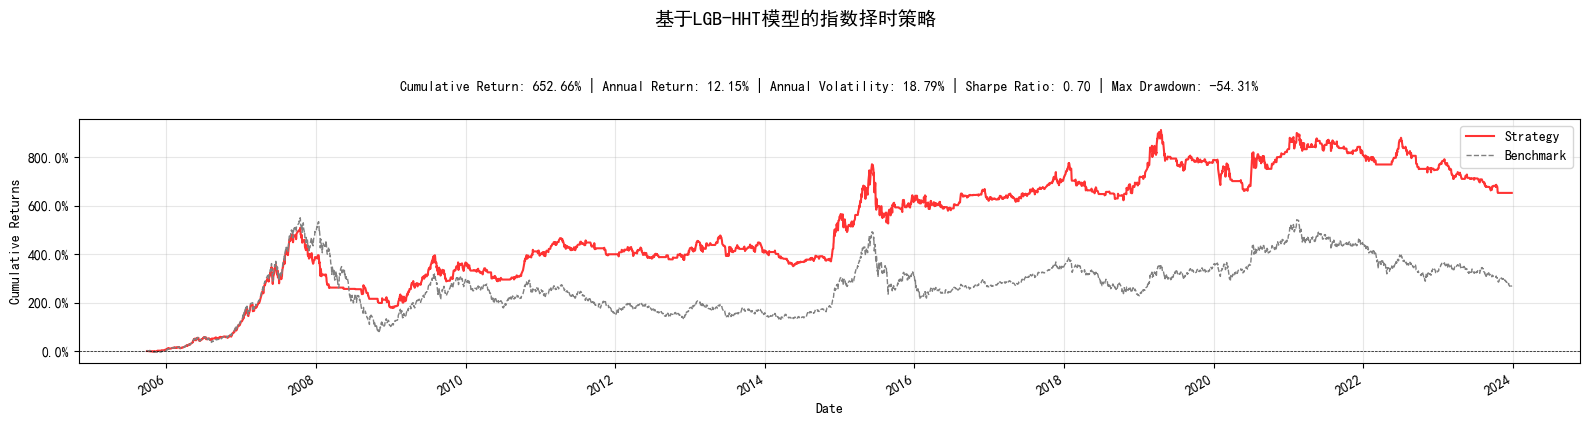

In [25]:
plot_cumulative_returns(
    get_strategy_return(hht_lgb_strat),
    hs300_data["close"].pct_change().loc[lgb_cf.index],
    title="基于LGB-HHT模型的指数择时策略",
    figsize=(16, 4),
)

In [26]:
# lgb_cf_returns: pd.Series = (
#     lgb_cf_predictions * instantaneous_phase["next_return"] * 0.01
# )

# plot_cumulative_returns(
#     lgb_cf_returns,
#     hs300_data["close"].pct_change(),
#     title="基于LGBM模型的指数择时策略",
#     figsize=(16, 4),
# )

## XGBC模型

In [28]:
import xgboost as xgb

def create_xgb_classifier_model(random_state=42):
    """
    创建XGBClassifier模型实例
    """
    params = {
        # 核心参数
        'objective': 'binary:logistic',  # 二分类问题
        'n_estimators': 100,            # 树的数量
        'learning_rate': 0.1,           # 学习率
        
        # 树的参数
        'max_depth': 6,                 # 树的最大深度
        'min_child_weight': 1,          # 最小子节点权重和
        'gamma': 0,                     # 节点分裂所需的最小损失函数下降值
        
        # 采样参数
        'subsample': 0.8,               # 训练每棵树时使用的样本比例
        'colsample_bytree': 0.8,        # 训练每棵树时使用的特征比例
        
        # 正则化参数
        'reg_alpha': 0,                 # L1正则化
        'reg_lambda': 1,                # L2正则化
        
        # 其他参数
        'random_state': random_state,   # 随机种子
        'n_jobs': -1,                   # 使用所有CPU核心
        'use_label_encoder': False,     # 不使用标签编码器
        'eval_metric': 'logloss'        # 评估指标
    }
    
    return xgb.XGBClassifier(**params)

In [29]:
xgb_cf_predictions = run_rolling_prediction(
    df=instantaneous_phase,
    feature_cols=feature_cols,
    target_col='target',
    step=5,
    train_window=60,
    horizon=5,
    model=create_xgb_classifier_model(),
    return_probability=False
)

Rolling prediction: 100%|██████████| 887/887 [27:51<00:00,  1.88s/it]  


2025-02-06 15:56:43.558 | INFO     | backtrader_utils.engine:load_data:119 - 开始加载数据...
数据加载到回测引擎...: 100%|██████████| 1/1 [00:00<00:00, 357.36it/s]
2025-02-06 15:56:43.564 | SUCCESS  | backtrader_utils.engine:load_data:134 - 数据加载完毕！
/data1/hugo/workspace/jupyter_develop/结合改进HHT模型和分类算法的交易策略/src/plotting.py:48: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f'Cumulative Return: {cum_returns[-1]:.2%} | '


<Axes: title={'center': 'Cumulative Return: 308.38% | Annual Return: 8.32% | Annual Volatility: 18.01% | Sharpe Ratio: 0.53 | Max Drawdown: -60.24%'}, xlabel='Date', ylabel='Cumulative Returns'>

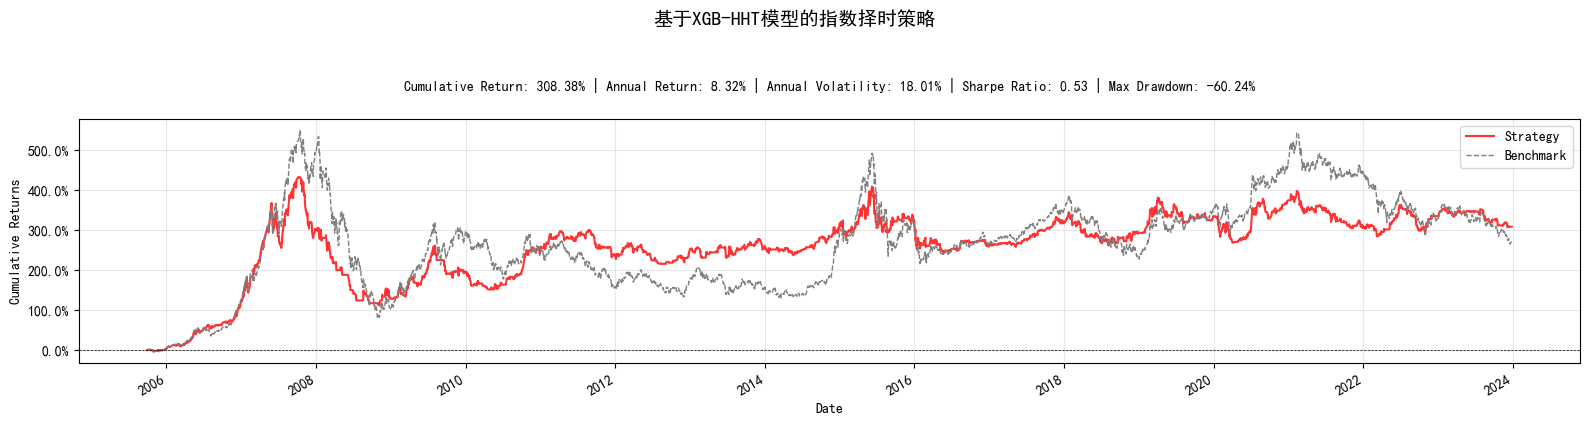

In [30]:
xgb_cf: pd.DataFrame = pd.concat(
    (hs300_data, xgb_cf_predictions.to_frame(name="binary_signal")), axis=1
).dropna(subset=["binary_signal"])
# 使用bt框架回测
hht_xgb_strat = run_template_strategy(
        xgb_cf,
        "000300.SH",
        BinarySignalStrategy,
        strategy_kwargs={"verbose": False, "hold_num": 1},
    )

plot_cumulative_returns(
    get_strategy_return(hht_xgb_strat),
    hs300_data["close"].pct_change().loc[xgb_cf.index],
    title="基于XGB-HHT模型的指数择时策略",
    figsize=(16, 4),
)

## CatC模型

In [31]:
from catboost import CatBoostClassifier


def create_catboost_classifier_model(random_state=42):
    """
    创建CatBoostClassifier模型实例
    """
    params = {
        # 核心参数
        "objective": "Logloss",  # 二分类问题的损失函数
        "iterations": 100,  # 迭代次数（树的数量）
        "learning_rate": 0.1,  # 学习率
        # 树的参数
        "depth": 6,  # 树的最大深度
        "min_data_in_leaf": 20,  # 叶子节点最小样本数
        "l2_leaf_reg": 3.0,  # L2正则化系数
        # 采样参数
        "subsample": 0.8,  # 每次迭代的采样比例
        "colsample_bylevel": 0.8,  # 每个节点的特征采样比例
        # 性能参数
        "thread_count": -1,  # 使用所有CPU核心
        "verbose": False,  # 不显示训练信息
        # 其他参数
        "random_seed": random_state,  # 随机种子
        "early_stopping_rounds": 50,  # 早停轮数
        # CatBoost特有参数
        "bootstrap_type": "Bernoulli",  # 采样方法
        "boosting_type": "Plain",  # 提升类型
        "grow_policy": "SymmetricTree",  # 树生长策略
    }

    return CatBoostClassifier(**params)

In [32]:
cat_cf_predictions = run_rolling_prediction(
    df=instantaneous_phase,
    feature_cols=feature_cols,
    target_col='target',
    step=5,
    train_window=60,
    horizon=5,
    model=create_catboost_classifier_model(),
    return_probability=False
)

Rolling prediction: 100%|██████████| 887/887 [04:04<00:00,  3.63it/s]


2025-02-06 16:00:49.377 | INFO     | backtrader_utils.engine:load_data:119 - 开始加载数据...
数据加载到回测引擎...: 100%|██████████| 1/1 [00:00<00:00, 341.86it/s]
2025-02-06 16:00:49.383 | SUCCESS  | backtrader_utils.engine:load_data:134 - 数据加载完毕！
/data1/hugo/workspace/jupyter_develop/结合改进HHT模型和分类算法的交易策略/src/plotting.py:48: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f'Cumulative Return: {cum_returns[-1]:.2%} | '


<Axes: title={'center': 'Cumulative Return: 289.87% | Annual Return: 8.04% | Annual Volatility: 18.35% | Sharpe Ratio: 0.51 | Max Drawdown: -51.42%'}, xlabel='Date', ylabel='Cumulative Returns'>

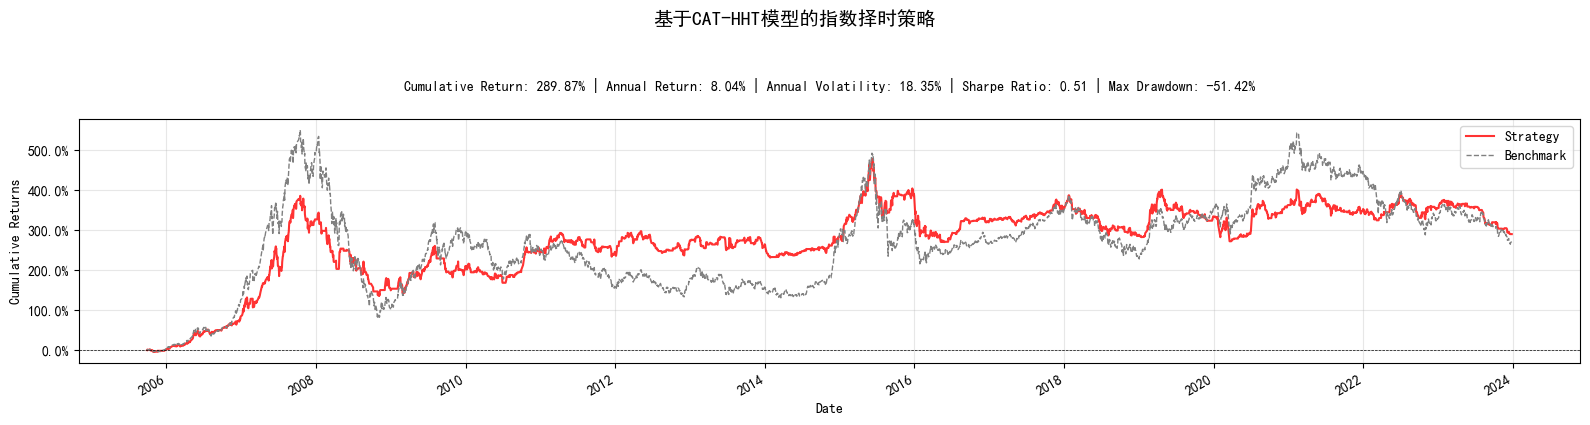

In [33]:
cat_cf: pd.DataFrame = pd.concat(
    (hs300_data, cat_cf_predictions.to_frame(name="binary_signal")), axis=1
).dropna(subset=["binary_signal"])

# 使用bt框架回测
hht_cat_strat = run_template_strategy(
        cat_cf,
        "000300.SH",
        BinarySignalStrategy,
        strategy_kwargs={"verbose": False, "hold_num": 1},
    )

plot_cumulative_returns(
    get_strategy_return(hht_cat_strat),
    hs300_data["close"].pct_change().loc[xgb_cf.index],
    title="基于CAT-HHT模型的指数择时策略",
    figsize=(16, 4),
)